### №1 import libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### №2 Reading data

In [2]:
colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
spectra = np.load('../bin_data/data.npy')
lab = np.load('../bin_data/labels.npy')
x_axis = np.load('../bin_data/x_axis.npy')
labels = np.asarray([int(i[1:])-1  for i in lab])
x_train, x_test, y_train, y_test = train_test_split(spectra,labels)

### №3 Section for visualizing input data

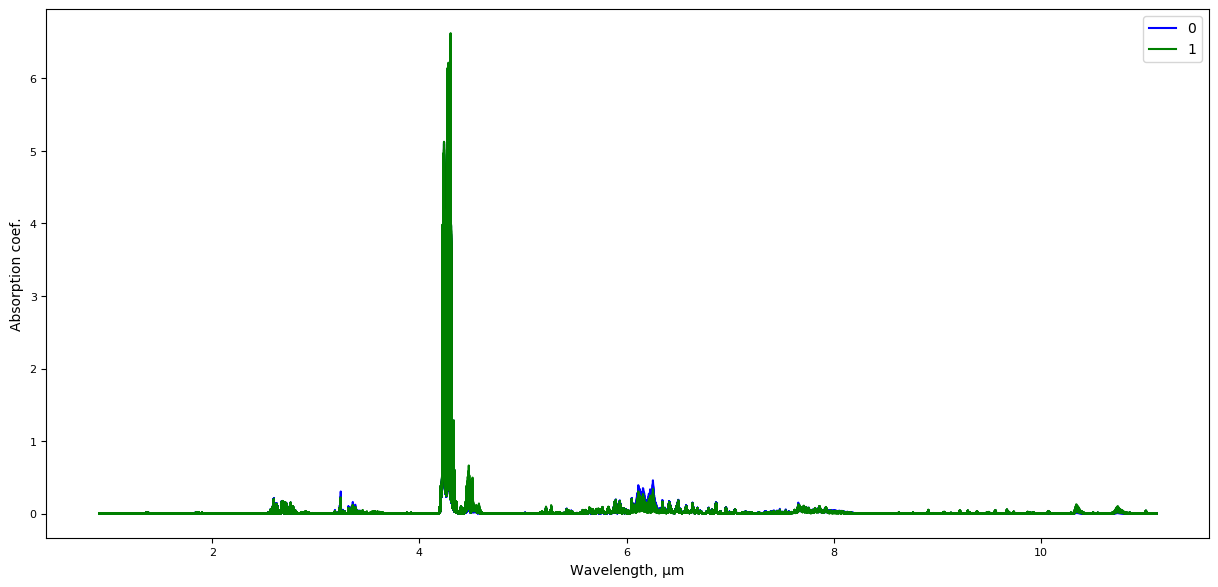

In [3]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption coef.', fontsize=10)
    plt.xlabel('Wavelength, µm', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(x_axis, spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

### №4 Section for demonstration of an example of the random forest #RF application

In [4]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity )

Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
